In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Stats on Disorders affecting the nervous system
Data from Table 2: https://www.thelancet.com/journals/laneur/article/PIIS1474-4422(24)00038-3/fulltext

In [43]:
df = pd.read_excel("./data/gbd_2021_nervous_system_stats.xlsx", header=1)
# Keep only the first 3 columns
df = df.iloc[:, :3]
df = df.dropna(subset=['Unnamed: 0'])
df['Counts (thousands)'] = df['Counts (thousands)'].astype(str)

In [44]:
df.head(15)

,Unnamed: 0,Counts (thousands),Age-standardised rate (per 100 000 people)
1,All neurological conditions,nan,NaN
2,DALYs,443 000 (378 000 to 521 000),18·2% (8·7 to 26·7)
3,YLDs,168 000 (114 000 to 243 000),85·6% (75·8 to 98·0)
4,YLLs,275 000 (247 000 to 316 000),−3·1% (−11·8 to 7·7)
5,Prevalence,3 400 000 (3 200 000 to 3 620 000),58·8% (56·3 to 61·5)
6,Deaths,11 100 (9750 to 13 800),41·2% (28·1 to 58·8)
7,Alzheimer's disease and other dementias,nan,NaN
8,DALYs,36 300 (17 200 to 77 400),168·7% (156·3 to 179·9)
9,YLDs,11 600 (7960 to 15 300),162·7% (157·0 to 168·0)
10,YLLs,24 700 (6370 to 65 700),173·4% (153·2 to 192·5)


In [134]:
# Initialize variables to store extracted metrics
diseases = []
daly = []
ylds = []
ylls = []
prevalence = []
deaths = []
prevalence_percentage_change = []

# Iterate over rows to extract metrics for each disease
for index, row in df.iterrows():
    if pd.notna(row['Counts (thousands)']) and row['Counts (thousands)']!="nan":
        # If the row contains metric information, add it to the current disease's metrics
        metric_name = row['Unnamed: 0']
        metric_value = row['Counts (thousands)']
        perc_change = row['Age-standardised rate (per 100 000 people)'].replace(" ", "").replace("·", ",").replace("%", "")
        perc_change_value = re.findall(r'\d+', re.sub(r'\(.*?\)', '', perc_change))
        perc_change_value = ".".join(perc_change_value)

        values = re.findall(r'\d+', re.sub(r'\(.*?\)', '', metric_value.replace(" ", "").replace("·", ",")))
        values = "".join(values)
        #print(values)
        # Handle the range of values by taking the first value
        metric_value = int(values)
        #print(metric_value)
        if metric_name == "Prevalence":
            #print("prev ", metric_value)
            prevalence.append(metric_value)
            prevalence_percentage_change.append(perc_change_value)
        elif metric_name == "YLDs" and current_disease != "Other neurological disorders":
            #print("yld ", metric_value)
            ylds.append(metric_value)
    else:
        # If the row contains a new disease, store the previous disease's metrics and reset the current metrics
        current_disease = row['Unnamed: 0']
        if current_disease is not None and current_disease != "Other neurological disorders":
            diseases.append(current_disease)
            #print(current_disease)


In [136]:
len(ylds)

37

In [138]:
metrics_df = pd.DataFrame({
    'Disease': diseases,
    'Prevalence': prevalence,
    'Prevalence % change': prevalence_percentage_change,
    'YLDs': ylds
})

In [139]:
metrics_df_without_total = metrics_df[metrics_df['Disease']!="All neurological conditions"]

In [140]:
metrics_df_without_total.head()

,Disease,Prevalence,Prevalence % change,YLDs
1,Alzheimer's disease and other dementias,56900,160.8,11600
2,Attention deficit hyperactivity disorder,84800,18.8,1030
3,Autism spectrum disorder,61800,47.5,11500
4,Cerebral malaria,996,122.2,407
5,Congenital birth defects†,13900,56.0,1450


/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_57483/2040627903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df_without_total['YLDs'] = pd.to_numeric(metrics_df_without_total['YLDs'], errors='coerce')


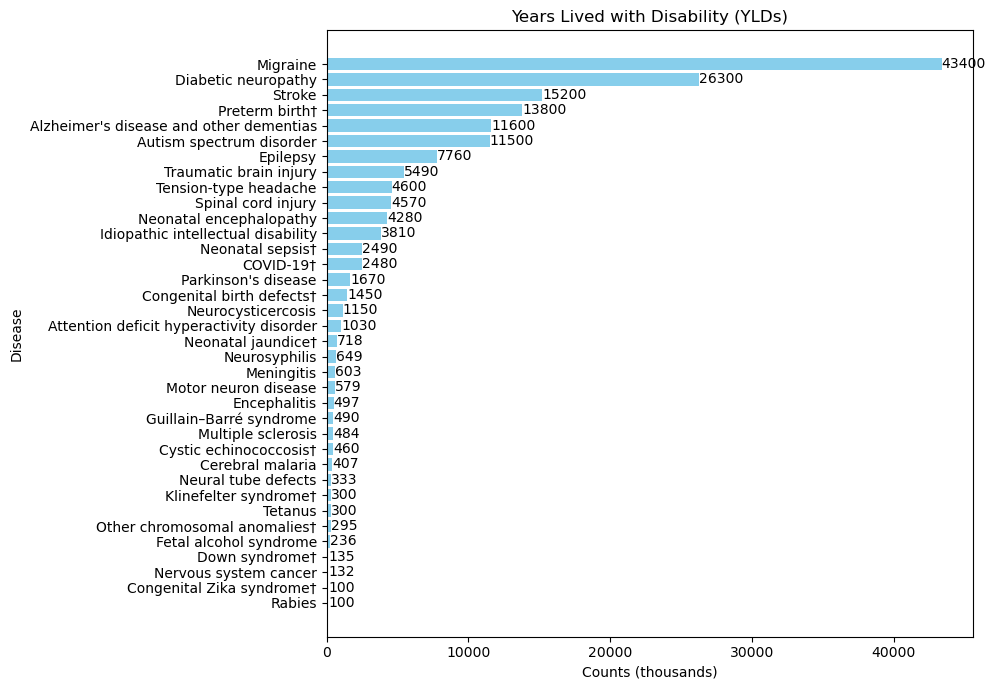

In [150]:
metrics_df_without_total['YLDs'] = pd.to_numeric(metrics_df_without_total['YLDs'], errors='coerce')

# Sorting the dataframe by 'Prevalence % change' in ascending order
df_sorted = metrics_df_without_total.sort_values(by='YLDs', ascending=True)

plt.figure(figsize=(10, 7))
bars = plt.barh(df_sorted['Disease'], df_sorted['YLDs'], color='skyblue')

# Removing grid lines
plt.grid(False)

# Adding value labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f"{bar.get_width():.0f}", 
             va='center', ha='left')

plt.xlabel('Counts (thousands)')
plt.ylabel('Disease')
plt.title('Years Lived with Disability (YLDs)')
plt.tight_layout()
plt.savefig("viz/diseases_burden/ylds.png")

plt.show()

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_57483/527661627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df_without_total['Prevalence % change'] = pd.to_numeric(metrics_df_without_total['Prevalence % change'], errors='coerce')


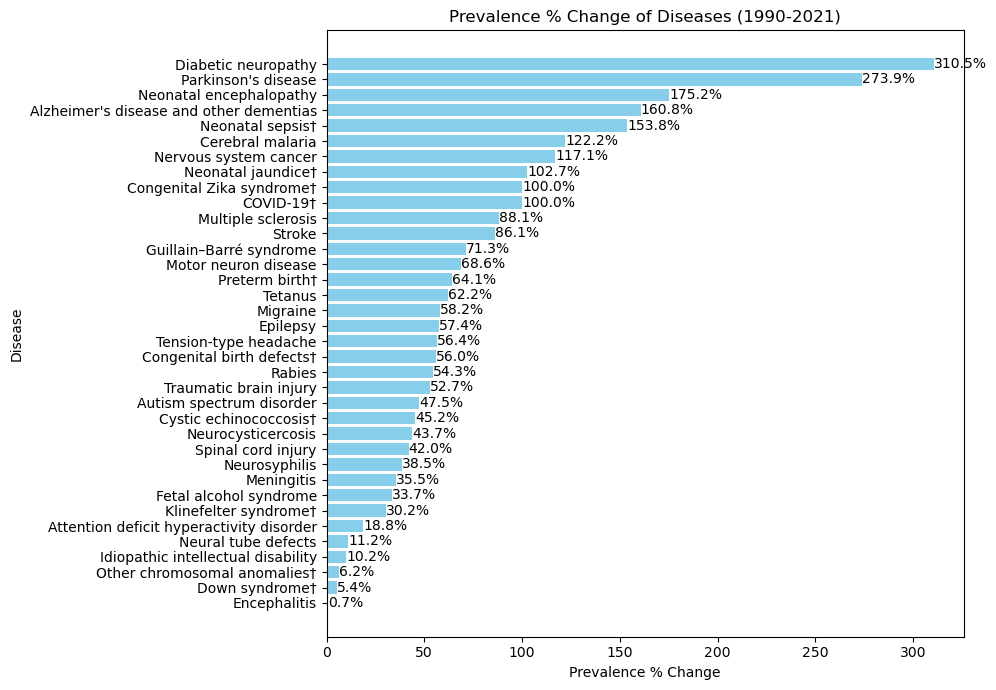

In [151]:
metrics_df_without_total['Prevalence % change'] = pd.to_numeric(metrics_df_without_total['Prevalence % change'], errors='coerce')

# Sorting the dataframe by 'Prevalence % change' in ascending order
df_sorted = metrics_df_without_total.sort_values(by='Prevalence % change', ascending=True)

plt.figure(figsize=(10, 7))
bars = plt.barh(df_sorted['Disease'], df_sorted['Prevalence % change'], color='skyblue')

# Removing grid lines
plt.grid(False)

# Adding value labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f"{bar.get_width():.1f}%", 
             va='center', ha='left')

plt.xlabel('Prevalence % Change')
plt.ylabel('Disease')
plt.title('Prevalence % Change of Diseases (1990-2021)')
plt.tight_layout()
plt.savefig("viz/diseases_burden/prevalence_change.png")

plt.show()

2010000

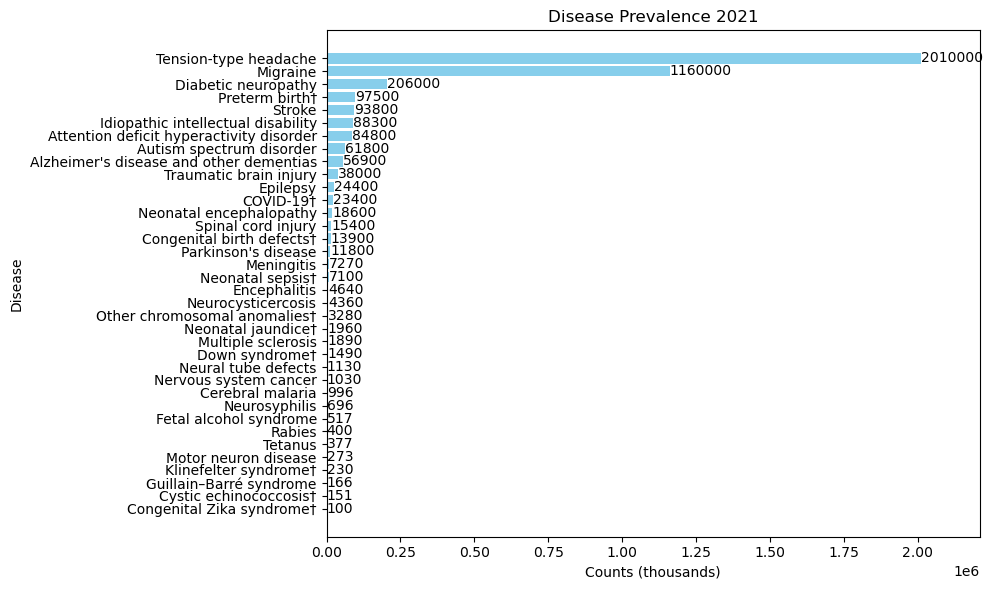

In [166]:
sorted_df = metrics_df_without_total.sort_values(by='Prevalence', ascending=True)

# Plot disease prevalence
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_df['Disease'], sorted_df['Prevalence'], color='skyblue')
plt.xlabel('Counts (thousands)')
plt.ylabel('Disease')
plt.title('Disease Prevalence 2021')
plt.xlim(0, max(sorted_df['Prevalence']) +200000)
plt.tight_layout()

# Add text annotations
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, '%d' % int(width), ha='left', va='center')
plt.savefig("viz/diseases_burden/prevalence.png")

plt.show()


In [69]:
len(diseases), len(prevalence)

(37, 37)

In [13]:
        
        # If the row contains a new disease, store the previous disease's metrics and reset the current metrics
        if current_disease is not None:
            diseases.append(current_disease)
            daly.append(sum(current_metrics['DALYs']))
            ylds.append(sum(current_metrics['YLDs']))
            ylls.append(sum(current_metrics['YLLs']))
            prevalence.append(sum(current_metrics['Prevalence']))
            deaths.append(sum(current_metrics['Deaths']))
            percentage_change.append(sum(current_metrics['Percentage change, 1990–2021']))
        
        # Start accumulating metrics for the new disease
        current_disease = row['Unnamed: 0']
        current_metrics = {'DALYs': [], 'YLDs': [], 'YLLs': [], 'Prevalence': [], 'Deaths': [], 'Percentage change, 1990–2021': []}
        
        # Add the current row's metrics to the new disease's metrics
        metric_name = row['Unnamed: 0']
        metric_value = float(row['Counts (thousands)'].split()[0].replace(',', ''))
        
        if metric_name in current_metrics:
            current_metrics[metric_name].append(metric_value)

,Disease,DALYs,YLDs,YLLs,Prevalence,Deaths,Percentage Change
